Wyliczone współczynniki:
a = 0.0000
b = 0.0000


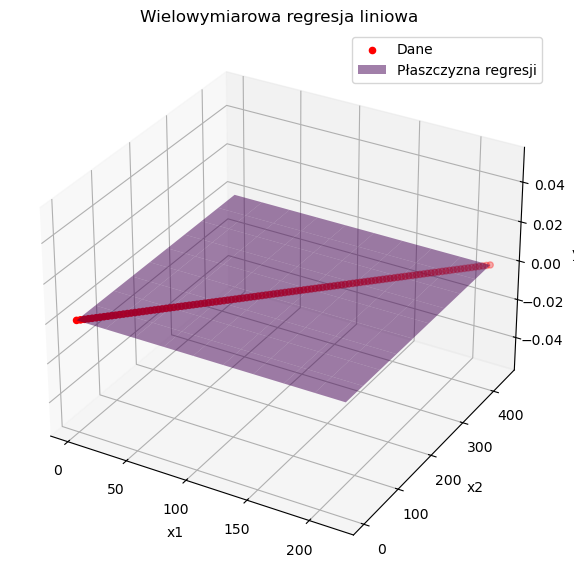

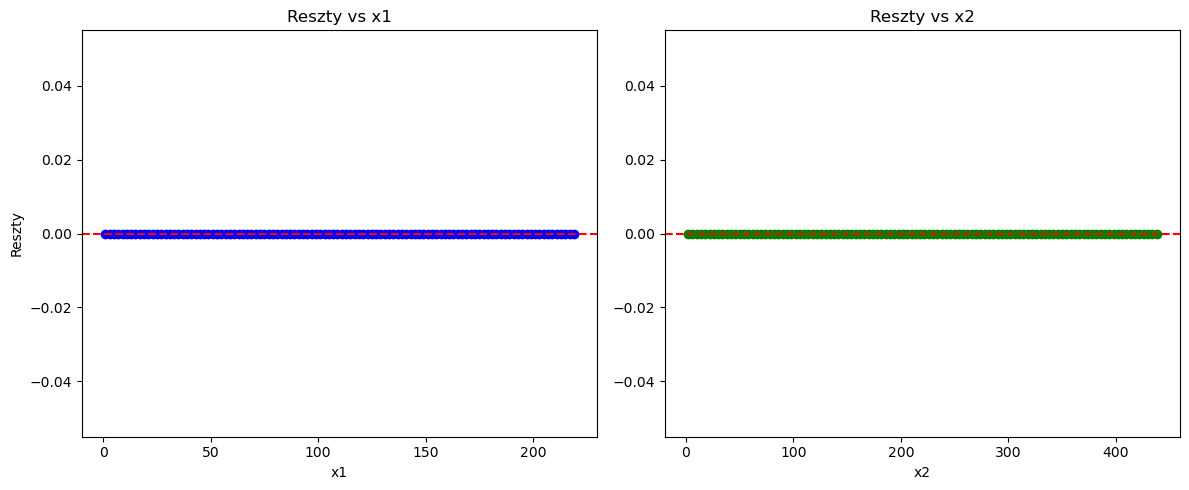

In [2]:
# Importowanie niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Wczytanie danych z pliku CSV
df = pd.read_csv('war4.csv', delimiter=';', header=0)

# Ekstrakcja danych do osobnych tablic
x1 = df['x1'].values.astype(float)
x2 = df['x2'].values.astype(float)
y = df['y'].values.astype(float)

# Utworzenie macierzy projektowej X
X = np.column_stack((x1, x2))

# Obliczenie współczynników regresji używając pseudoodwrotności
coefficients = np.linalg.pinv(X) @ y
a, b = coefficients

# Wyświetlenie wyników
print(f"Wyliczone współczynniki:")
print(f"a = {a:.4f}")
print(f"b = {b:.4f}")

# Wykres 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Punkty danych
ax.scatter(x1, x2, y, c='r', marker='o', label='Dane')

# Generowanie siatki dla płaszczyzny regresji
x1_range = np.linspace(min(x1), max(x1), 10)
x2_range = np.linspace(min(x2), max(x2), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_plane = a * x1_mesh + b * x2_mesh

# Rysowanie płaszczyzny regresji
ax.plot_surface(x1_mesh, x2_mesh, y_plane, alpha=0.5, cmap='viridis', label='Płaszczyzna regresji')

# Konfiguracja wykresu
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Wielowymiarowa regresja liniowa')
plt.legend()
plt.show()

# Wykresy residualne
y_pred = X @ coefficients
residuals = y - y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Residual vs x1
ax1.scatter(x1, residuals, c='b')
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('x1')
ax1.set_ylabel('Reszty')
ax1.set_title('Reszty vs x1')

# Residual vs x2
ax2.scatter(x2, residuals, c='g')
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('x2')
ax2.set_title('Reszty vs x2')

plt.tight_layout()
plt.show()